In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path= 'data/'

In [4]:
상업업무용매매실거래가 = pd.read_csv(file_path+ '11.세종시_상업업무용(매매)_실거래가.csv')
토지매매실거래가 = pd.read_csv(file_path+'12.세종시_토지(매매)_실거래가.csv')
분양권실거래가 = pd.read_csv(file_path+'13.세종시_분양권_실거래가.csv')
공시지가 = pd.read_csv(file_path+'18.세종시_개별공시지가(2017~2020).csv')
아파드매매실거래가 = pd.read_csv(file_path+'3.세종시_아파트(매매)_실거래가.csv')
연립매매실거래가 =pd.read_csv(file_path+'4.세종시_연립다세대(매매)_실거래가.csv')
단독다가구매매실거래가= pd.read_csv(file_path+'5.세종시_단독다가구(매매)_실거래가.csv')
오피스텔매매실거래가 = pd.read_csv(file_path+'6.세종시_오피스텔(매매)_실거래가.csv')

In [5]:
공시지가.head()

,id,법정동코드,지번본번부번,법정동명,특수지구분코드,특수지구분명,지번,기준년도,기준월,공시지가,공시일자,표준지여부,데이터기준일자
0,123,3611010100,100210003,세종특별자치시 반곡동,1,일반,21_3,2017,1,75900,2017-05-31,N,2017-07-20
1,166,3611010100,100320009,세종특별자치시 반곡동,1,일반,32_9,2017,1,75900,2017-05-31,N,2017-07-20
2,451,3611010100,100500012,세종특별자치시 반곡동,1,일반,50_12,2017,1,75900,2017-05-31,N,2017-07-20
3,2023,3611010100,102340004,세종특별자치시 반곡동,1,일반,234_4,2017,1,75900,2017-05-31,N,2017-07-20
4,2030,3611010100,102340007,세종특별자치시 반곡동,1,일반,234_7,2017,1,75900,2017-05-31,N,2017-07-20


In [6]:
아파드매매실거래가.head()

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,"23,000",11,2015,NaN
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,"32,500",21,2015,NaN
3,201701,9,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,"25,100",7,2015,NaN
4,201701,9,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,"32,250",3,2015,NaN


In [7]:
연립매매실거래가.head()

,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,18,세종특별자치시 전의면 관정리,262,6,홍성맨션3차,53.965,77.15,"4,300",4,2002,NaN
1,201701,26,세종특별자치시 조치원읍 서창리,140,11,삼현빌라,48.530,37.30,"4,000",2,1989,NaN
2,201701,3,세종특별자치시 조치원읍 원리,132,7,고려1동,62.080,36.31,"4,700",2,1983,NaN
3,201701,13,세종특별자치시 조치원읍 침산리,167,6,용성빌라,64.230,42.25,"6,500",2,1991,NaN
4,201702,1,세종특별자치시 조치원읍 신흥리,106,0,주공연립,67.900,133.43,"12,800",1,1984,NaN


In [8]:
단독다가구매매실거래가.head()

,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
0,201701,10,세종특별자치시 금남면 성덕리,단독,8m미만,56.20,354.0,"11,000",1934.0,NaN
1,201701,6,세종특별자치시 금남면 용담리,단독,8m미만,95.76,537.0,"26,000",1977.0,NaN
2,201701,10,세종특별자치시 부강면 부강리,단독,12m미만,659.57,320.0,"112,000",2013.0,NaN
3,201701,9,세종특별자치시 연기면 보통리,단독,25m미만,307.24,660.0,"135,000",2004.0,NaN
4,201701,13,세종특별자치시 연기면 수산리,단독,12m미만,100.00,570.0,"33,000",1987.0,NaN


In [9]:
오피스텔매매실거래가.head()

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,4,세종특별자치시 어진동,0,0,푸르지오시티,23.74,"9,000",14,2014,NaN
1,201701,6,세종특별자치시 어진동,0,0,푸르지오시티,23.74,"9,500",11,2014,NaN
2,201702,5,세종특별자치시 나성동,713,0,세진이너스빌,34.15,"13,000",8,2013,NaN
3,201702,9,세종특별자치시 도담동,246,5,세종한신휴시티,29.47,"13,000",6,2014,NaN
4,201702,17,세종특별자치시 어진동,0,0,2차푸르지오시티,23.24,"12,300",12,2014,NaN


In [5]:
def 읍면동(df):
    EMD_KOR_NM = df['시군구'].str.extract('( \w*읍)|( \w*면)|( \w*동)').dropna(how='all').fillna('-')
    EMD_KOR_NM=(EMD_KOR_NM[0]+EMD_KOR_NM[1]+EMD_KOR_NM[2]).str.replace('--','').str.replace('-','').str.strip()
    df = pd.concat([df,EMD_KOR_NM],axis=1)
    df.rename(columns={0:'EMD_KOR_NM'}, inplace=True)
    return df

In [6]:
아파드매매실거래가=읍면동(아파드매매실거래가)
연립매매실거래가= 읍면동(연립매매실거래가)
단독다가구매매실거래가 = 읍면동(단독다가구매매실거래가)
오피스텔매매실거래가 = 읍면동(오피스텔매매실거래가)

In [12]:
# 각각 읍면동분리해서 뜯어주기
EMD_KOR_NM = 아파드매매실거래가['시군구'].str.extract('( \w*읍)|( \w*면)|( \w*동)').dropna(how='all').fillna('-')

In [13]:
EMD_KOR_NM=(EMD_KOR_NM[0]+EMD_KOR_NM[1]+EMD_KOR_NM[2]).str.replace('--','').str.replace('-','').str.strip()

In [14]:
아파드매매실거래가 = pd.concat([아파드매매실거래가,EMD_KOR_NM],axis=1)

In [15]:
아파드매매실거래가.rename(columns={0:'EMD_KOR_NM'}, inplace=True)

In [16]:
아파드매매실거래가.head()

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,EMD_KOR_NM,EMD_KOR_NM
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,"23,000",11,2015,NaN,고운동,고운동
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN,고운동,고운동
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,"32,500",21,2015,NaN,고운동,고운동
3,201701,9,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,"25,100",7,2015,NaN,고운동,고운동
4,201701,9,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,"32,250",3,2015,NaN,고운동,고운동


In [7]:
def 계약일(df):
    df['계약년월']=df['계약년월'].astype(str)
    df['계약년'] =df['계약년월'].str[:4]
    df['계약월']= df['계약년월'].str[-2:]
    return df

In [8]:
아파드매매실거래가= 계약일(아파드매매실거래가)
오피스텔매매실거래가= 계약일(오피스텔매매실거래가)
단독다가구매매실거래가= 계약일(단독다가구매매실거래가)
연립매매실거래가= 계약일(연립매매실거래가)

In [19]:
아파드매매실거래가['계약년월']=아파드매매실거래가['계약년월'].astype(str)
아파드매매실거래가['계약년'] =아파드매매실거래가['계약년월'].str[:4]
아파드매매실거래가['계약월']= 아파드매매실거래가['계약년월'].str[-2:]

오피스텔매매실거래가['계약년월']=오피스텔매매실거래가['계약년월'].astype(str)
오피스텔매매실거래가['계약년'] =오피스텔매매실거래가['계약년월'].str[:4]
오피스텔매매실거래가['계약월']= 오피스텔매매실거래가['계약년월'].str[-2:]

단독다가구매매실거래가['계약년월']=단독다가구매매실거래가['계약년월'].astype(str)
단독다가구매매실거래가['계약년'] =단독다가구매매실거래가['계약년월'].str[:4]
단독다가구매매실거래가['계약월']= 단독다가구매매실거래가['계약년월'].str[-2:]

연립매매실거래가['계약년월']=연립매매실거래가['계약년월'].astype(str)
연립매매실거래가['계약년'] =연립매매실거래가['계약년월'].str[:4]
연립매매실거래가['계약월']= 연립매매실거래가['계약년월'].str[-2:]

In [20]:
아파드매매실거래가.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   계약년월        18409 non-null  object 
 1   계약일         18409 non-null  int64  
 2   시군구         18409 non-null  object 
 3   본번          18409 non-null  object 
 4   부번          18409 non-null  int64  
 5   단지명         18409 non-null  object 
 6   전용면적(㎡)     18409 non-null  float64
 7   거래금액(만원)    18409 non-null  object 
 8   층           18409 non-null  int64  
 9   건축년도        18409 non-null  int64  
 10  해제사유발생일     490 non-null    float64
 11  EMD_KOR_NM  18409 non-null  object 
 12  EMD_KOR_NM  18409 non-null  object 
 13  계약년         18409 non-null  object 
 14  계약월         18409 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.1+ MB


In [9]:
def 타입전환(df):
    df['거래금액(만원)']= df['거래금액(만원)'].str.replace(',','')
    df['거래금액(만원)'] =df['거래금액(만원)'].astype(int)
    return df

In [10]:
아파드매매실거래가 = 타입전환(아파드매매실거래가)
오피스텔매매실거래가 = 타입전환(오피스텔매매실거래가)
단독다가구매매실거래가 = 타입전환(단독다가구매매실거래가)
연립매매실거래가 = 타입전환(연립매매실거래가)

In [23]:
아파드매매실거래가['거래금액(만원)']= 아파드매매실거래가['거래금액(만원)'].str.replace(',','')
아파드매매실거래가['거래금액(만원)'] =아파드매매실거래가['거래금액(만원)'].astype(int)

오피스텔매매실거래가['거래금액(만원)']= 오피스텔매매실거래가['거래금액(만원)'].str.replace(',','')
오피스텔매매실거래가['거래금액(만원)'] =오피스텔매매실거래가['거래금액(만원)'].astype(int)

단독다가구매매실거래가['거래금액(만원)']= 단독다가구매매실거래가['거래금액(만원)'].str.replace(',','')
단독다가구매매실거래가['거래금액(만원)'] =단독다가구매매실거래가['거래금액(만원)'].astype(int)

연립매매실거래가['거래금액(만원)']= 연립매매실거래가['거래금액(만원)'].str.replace(',','')
연립매매실거래가['거래금액(만원)'] =연립매매실거래가['거래금액(만원)'].astype(int)

AttributeError: Can only use .str accessor with string values!

In [24]:
아파드매매실거래가.groupby('계약년').sum()['거래금액(만원)']

계약년
2017    128483204
2018    106536498
2019     76938137
2020    343224473
Name: 거래금액(만원), dtype: int64

In [25]:
오피스텔매매실거래가.groupby('계약년').sum()['거래금액(만원)']

계약년
2017     483502
2018     413967
2019     372798
2020    1602495
Name: 거래금액(만원), dtype: int64

In [26]:
단독다가구매매실거래가.groupby('계약년').sum()['거래금액(만원)']

계약년
2017    13169691
2018     9249092
2019     7163803
2020    10832951
Name: 거래금액(만원), dtype: int64

In [27]:
연립매매실거래가.groupby('계약년').sum()['거래금액(만원)']

계약년
2017    1147470
2018     565950
2019     882967
2020    1491998
Name: 거래금액(만원), dtype: int64

In [28]:
공시지가.groupby('기준년도').sum()['공시지가']

기준년도
2017    22958905504
2018    24948890588
2019    27320170796
2020    29262529597
Name: 공시지가, dtype: int64

In [11]:
공시지가['기준년도']= 공시지가['기준년도'].astype(str)

In [30]:
오피스텔매매실거래가.head()

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,EMD_KOR_NM,계약년,계약월
0,201701,4,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9000,14,2014,NaN,어진동,2017,01
1,201701,6,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9500,11,2014,NaN,어진동,2017,01
2,201702,5,세종특별자치시 나성동,713,0,세진이너스빌,34.15,13000,8,2013,NaN,나성동,2017,02
3,201702,9,세종특별자치시 도담동,246,5,세종한신휴시티,29.47,13000,6,2014,NaN,도담동,2017,02
4,201702,17,세종특별자치시 어진동,0,0,2차푸르지오시티,23.24,12300,12,2014,NaN,어진동,2017,02


<AxesSubplot:label='5989c18a-fb80-4974-bf9c-90626ac7c820', xlabel='기준년도', ylabel='공시지가'>

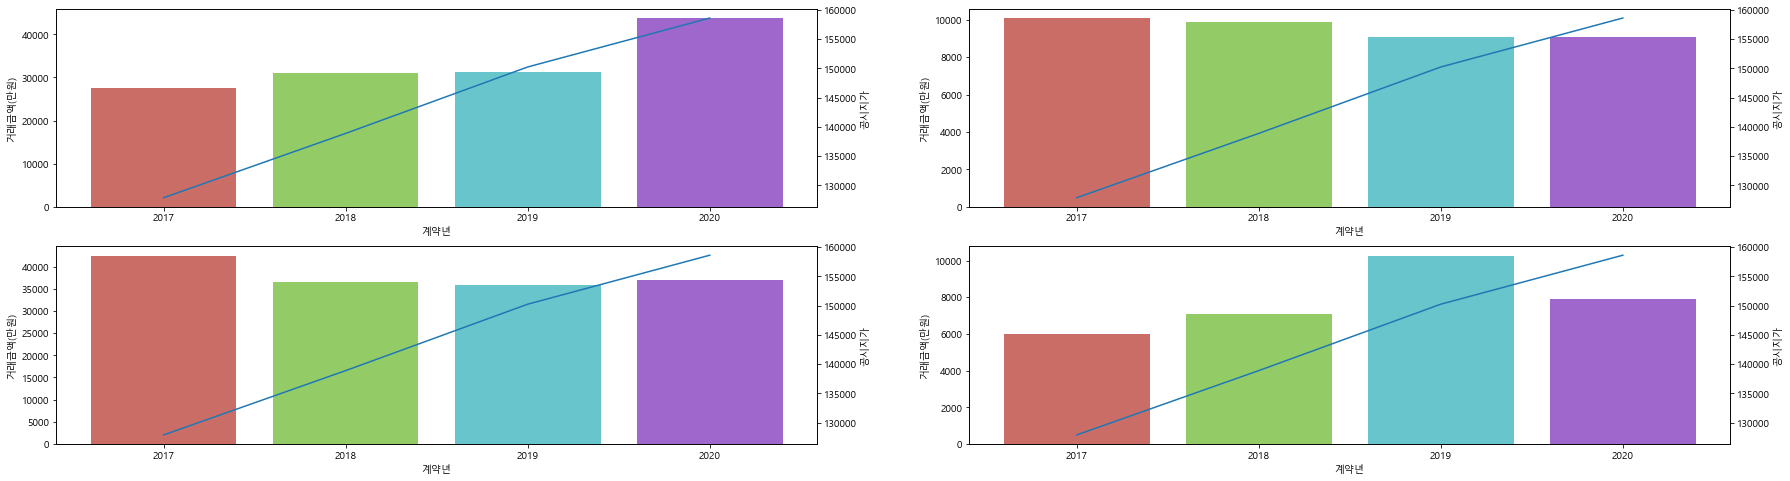

In [31]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(30,8)

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7= ax3.twinx()
ax8= ax4.twinx()

sns.barplot(data=아파드매매실거래가, x="계약년", y="거래금액(만원)", ax=ax1,ci=None,palette='hls')  #아파트
sns.lineplot(data=공시지가,x="기준년도",y="공시지가",ax=ax5,ci=None,markers=True)
sns.barplot(data=오피스텔매매실거래가, x="계약년", y="거래금액(만원)", ax=ax2,ci=None,palette='hls')  #오피스텔 
sns.lineplot(data=공시지가,x="기준년도",y="공시지가",ax=ax6,ci=None,markers=True)
sns.barplot(data=단독다가구매매실거래가, x="계약년", y="거래금액(만원)", ax=ax3,ci=None,palette='hls') #단독다가구
sns.lineplot(data=공시지가,x="기준년도",y="공시지가",ax=ax7,ci=None,markers=True)
sns.barplot(data=연립매매실거래가, x="계약년", y="거래금액(만원)", ax=ax4,ci=None,palette='hls') # 연립 
sns.lineplot(data=공시지가,x="기준년도",y="공시지가",ax=ax8,ci=None,markers=True)

아파트를 제외하곤 실거래 매매가는 떨어짐

<AxesSubplot:xlabel='기준년도', ylabel='공시지가'>

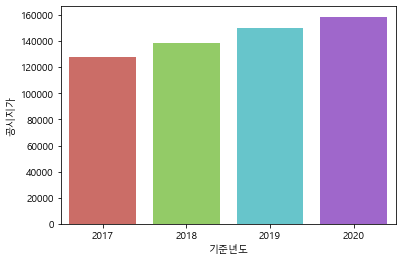

In [32]:
# 공시지가 그래프
sns.barplot(data=공시지가, x="기준년도", y="공시지가",ci=None,palette='hls')  #공시지가

<AxesSubplot:xlabel='기준년도', ylabel='공시지가'>

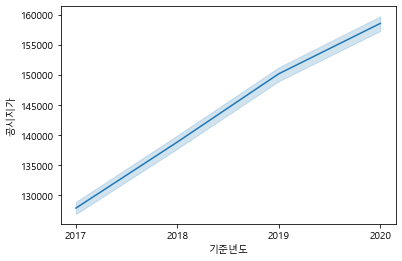

In [33]:
sns.lineplot(data=공시지가,x="기준년도",y="공시지가")

In [12]:
def 읍면동실거래가(df):
    df = df.groupby('EMD_KOR_NM').sum()['거래금액(만원)'].reset_index()
    return df

In [13]:
아파트지역별매매실거래가 =읍면동실거래가(아파드매매실거래가)
연립지역별매매실거래가= 읍면동실거래가(연립매매실거래가)
단독다가구지역별매매실거래가 = 읍면동실거래가(단독다가구매매실거래가)
오피스텔지역별매매실거래가 = 읍면동실거래가(오피스텔매매실거래가)

In [14]:
# 어느지역 아파트매매실거래가 높은지
아파트지역별실거래가 = 아파드매매실거래가.groupby('EMD_KOR_NM').sum()['거래금액(만원)'].reset_index()
아파트지역별실거래가.head()

,EMD_KOR_NM,거래금액(만원)
0,가람동,54000
1,고운동,68312651
2,금남면,6030340
3,나성동,3069790
4,다정동,36808877


In [37]:
연립지역별매매실거래가.head()

,EMD_KOR_NM,거래금액(만원)
0,금남면,232100
1,도담동,62200
2,반곡동,283618
3,보람동,78500
4,부강면,688397


In [38]:
단독다가구지역별매매실거래가.head()

,EMD_KOR_NM,거래금액(만원)
0,고운동,399322
1,금남면,5002235
2,도담동,173500
3,부강면,3278681
4,새롬동,26433


In [39]:
오피스텔지역별매매실거래가.head()

,EMD_KOR_NM,거래금액(만원)
0,나성동,285533
1,도담동,319669
2,부강면,19000
3,어진동,2212060
4,조치원읍,36500


In [ ]:
with open('data/31.세종시_법정경계(읍면동).geojson',encoding="utf=8") as f:
    geo_data = json.loads(f.read())
    f.close()
center = [36.4801319,127.2887648]

m = folium.Map(location=center, zoom_start=11)

folium.Choropleth(
    geo_data=geo_data,
    data=아파트지역별실거래가,
    columns=('EMD_KOR_NM','거래금액(만원)'),
    key_on='feature.properties.EMD_KOR_NM',
    fill_color='YlGnBu',
    legend_name='실거래가',
    tooltip=folium.GeoJsonTooltip(fields=['EMD_KOR_NM'], aliases = ['동'])
).add_to(m)

m

In [ ]:
with open('data/31.세종시_법정경계(읍면동).geojson',encoding="utf=8") as f:
    geo_data = json.loads(f.read())
    f.close()
center = [36.4801319,127.2887648]

m = folium.Map(location=center, zoom_start=11)

folium.Choropleth(
    geo_data=geo_data,
    data=오피스텔지역별매매실거래가,
    columns=('EMD_KOR_NM','거래금액(만원)'),
    key_on='feature.properties.EMD_KOR_NM',
    fill_color='YlGnBu',
    legend_name='실거래가',
    tooltip=folium.GeoJsonTooltip(fields=['EMD_KOR_NM'], aliases = ['동'])
).add_to(m)

m

In [ ]:
with open('data/31.세종시_법정경계(읍면동).geojson',encoding="utf=8") as f:
    geo_data = json.loads(f.read())
    f.close()
center = [36.4801319,127.2887648]

m = folium.Map(location=center, zoom_start=11)

folium.Choropleth(
    geo_data=geo_data,
    data=단독다가구지역별매매실거래가,
    columns=('EMD_KOR_NM','거래금액(만원)'),
    key_on='feature.properties.EMD_KOR_NM',
    fill_color='YlGnBu',
    legend_name='실거래가',
    tooltip=folium.GeoJsonTooltip(fields=['EMD_KOR_NM'], aliases = ['동'])
).add_to(m)

m

In [ ]:
with open('data/31.세종시_법정경계(읍면동).geojson',encoding="utf=8") as f:
    geo_data = json.loads(f.read())
    f.close()
center = [36.4801319,127.2887648]

m = folium.Map(location=center, zoom_start=11)

folium.Choropleth(
    geo_data=geo_data,
    data=연립지역별매매실거래가,
    columns=('EMD_KOR_NM','거래금액(만원)'),
    key_on='feature.properties.EMD_KOR_NM',
    fill_color='YlGnBu',
    legend_name='실거래가',
    tooltip=folium.GeoJsonTooltip(fields=['EMD_KOR_NM'], aliases = ['동'])
).add_to(m)

m

<AxesSubplot:xlabel='EMD_KOR_NM', ylabel='거래금액(만원)'>

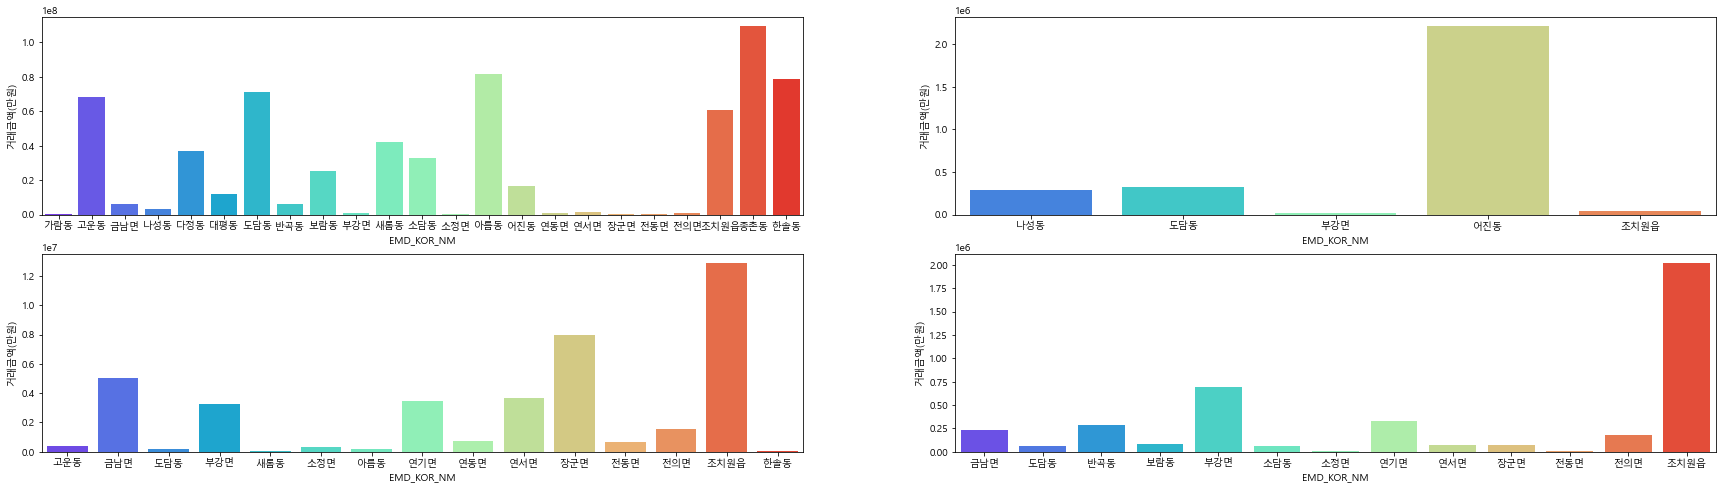

In [48]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(30,8)

sns.barplot(data=아파트지역별매매실거래가, x="EMD_KOR_NM", y="거래금액(만원)", ax=ax1,ci=None,palette='rainbow')  #아파트
sns.barplot(data=오피스텔지역별매매실거래가, x="EMD_KOR_NM", y="거래금액(만원)", ax=ax2,ci=None,palette='rainbow')  #오피스텔 
sns.barplot(data=단독다가구지역별매매실거래가, x="EMD_KOR_NM", y="거래금액(만원)", ax=ax3,ci=None,palette='rainbow') #단독다가구
sns.barplot(data=연립지역별매매실거래가, x="EMD_KOR_NM", y="거래금액(만원)", ax=ax4,ci=None,palette='rainbow') # 연립 

<AxesSubplot:xlabel='거래금액(만원)', ylabel='전용면적(㎡)'>

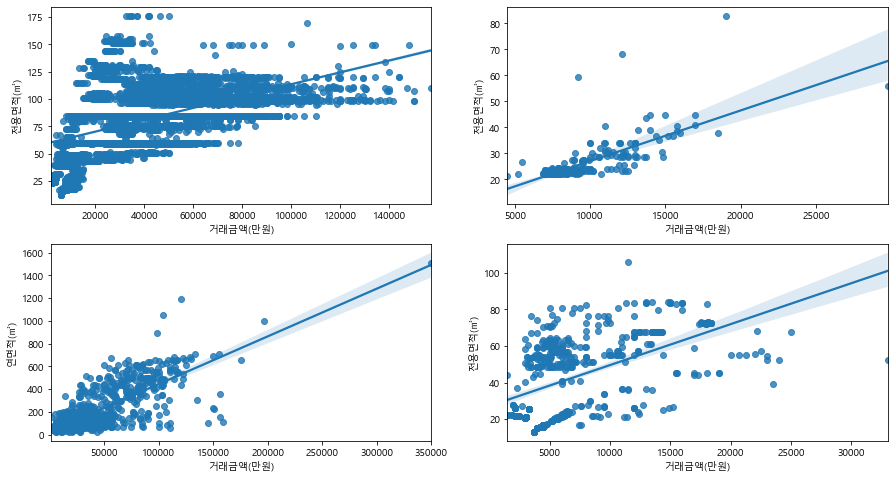

In [22]:
# 실거래가는 전용면적
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,8)

sns.regplot(x='거래금액(만원)',y='전용면적(㎡)',data=아파드매매실거래가,ax=ax1,fit_reg=True)#아파트
sns.regplot(x='거래금액(만원)',y='전용면적(㎡)',data=오피스텔매매실거래가,ax=ax2,fit_reg=True)#오피스텔 
sns.regplot(x='거래금액(만원)',y='연면적(㎡)',data=단독다가구매매실거래가,ax=ax3,fit_reg=True)#단독다가구
sns.regplot(x='거래금액(만원)',y='전용면적(㎡)',data=연립매매실거래가,ax=ax4,fit_reg=True)# 연립 


<AxesSubplot:xlabel='거래금액(만원)', ylabel='대지권면적(㎡)'>

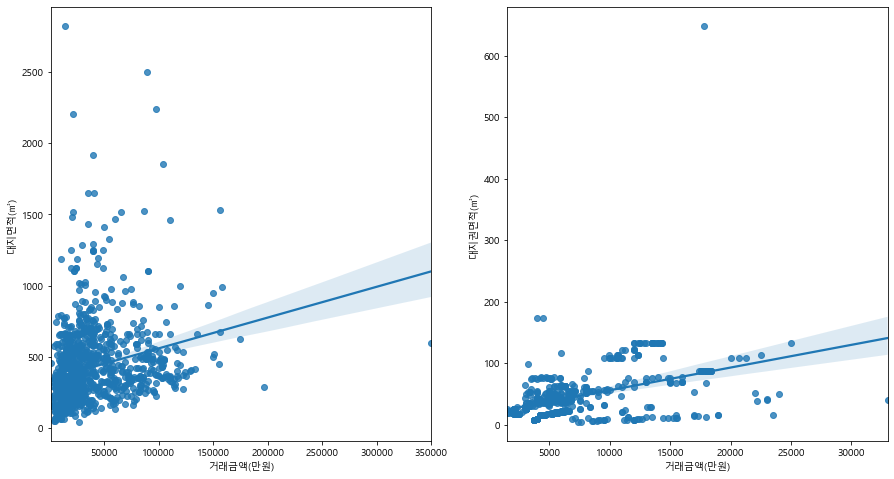

In [24]:
# 단독다가구 , 연립 대지면적
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,8)

sns.regplot(x='거래금액(만원)',y='대지면적(㎡)',data=단독다가구매매실거래가,ax=ax1,fit_reg=True)#단독다가구
sns.regplot(x='거래금액(만원)',y='대지권면적(㎡)',data=연립매매실거래가,ax=ax2,fit_reg=True)# 연립 

<AxesSubplot:xlabel='거래금액(만원)', ylabel='층'>

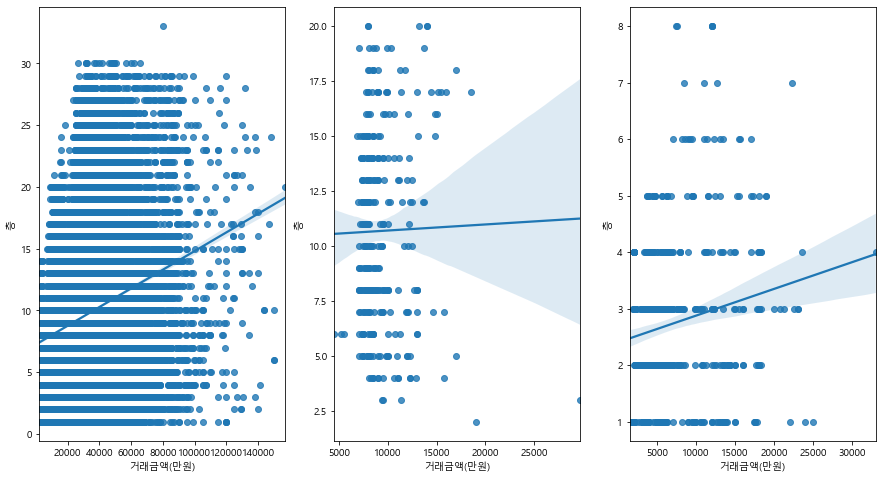

In [26]:
# 층수
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(15,8)

sns.regplot(x='거래금액(만원)',y='층',data=아파드매매실거래가,ax=ax1,fit_reg=True)#아파트
sns.regplot(x='거래금액(만원)',y='층',data=오피스텔매매실거래가,ax=ax2,fit_reg=True)#오피스텔 
sns.regplot(x='거래금액(만원)',y='층',data=연립매매실거래가,ax=ax3,fit_reg=True)# 연립 


<AxesSubplot:xlabel='거래금액(만원)', ylabel='건축년도'>

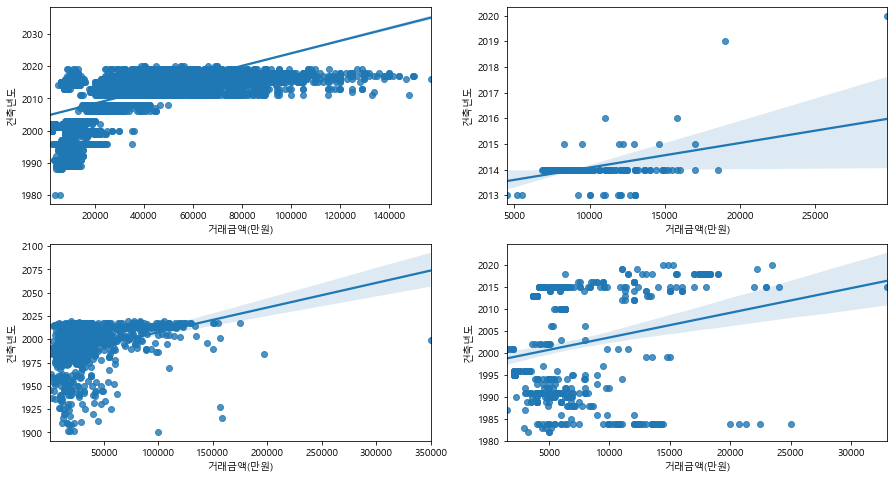

In [27]:
# 건축년도비교
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,8)

sns.regplot(x='거래금액(만원)',y='건축년도',data=아파드매매실거래가,ax=ax1,fit_reg=True)#아파트
sns.regplot(x='거래금액(만원)',y='건축년도',data=오피스텔매매실거래가,ax=ax2,fit_reg=True)#오피스텔 
sns.regplot(x='거래금액(만원)',y='건축년도',data=단독다가구매매실거래가,ax=ax3,fit_reg=True)#단독다가구
sns.regplot(x='거래금액(만원)',y='건축년도',data=연립매매실거래가,ax=ax4,fit_reg=True)# 연립 

In [ ]:
# 각 지역의 아파트,연립,다가구,오피스텔 클러스터링(거래금액,전용면적)

아파트지역별실거래가 = 아파드매매실거래가.groupby('EMD_KOR_NM').sum()['거래금액(만원)'].reset_index()
아파트지역별실거래가.head()